In [1]:
#
# A simple way to segment cell sheet in a phase-contrast image
#

In [2]:
%matplotlib inline
import numpy as np
from skimage import io, filters
from matplotlib import pyplot as plt

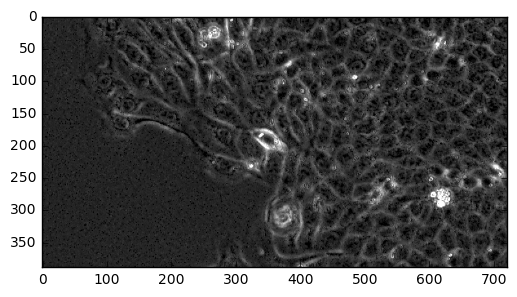

In [3]:
#
# read images and covert it from RGB to gray-scale 
#
path_img = 'img/cell_sheet.tiff'
img = io.imread(path_img)
#print(img.shape)
arr = img[:, :, 0].copy()
#print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

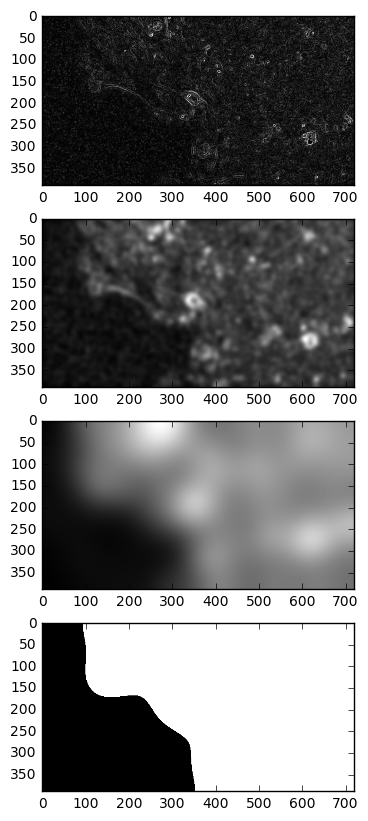

In [4]:
#
# compute the magnitute of intensity gradient as a "cell-sheet marker"
# and then apply a Gaussian blur filter to get a smooth mask
#
grad = filters.sobel(arr)# compute absolute gradient
grad_weak_blur = filters.gaussian(grad, 5, mode='reflect')# apply Gaussian filter
grad_blur = filters.gaussian(grad, 35, mode='reflect')# apply it strongly
img_grad_blur = np.uint8(grad_blur / grad_blur.max() * 255)
# make masking image by binary thresholding
thresh_otsu = filters.threshold_otsu(img_grad_blur)
mask_otsu = img_grad_blur > thresh_otsu
# visualize the intermediate images
plt.figure(figsize=(7, 10))
plt.subplot(4, 1, 1)
plt.imshow(grad, cmap='gray')
plt.subplot(4, 1, 2)
plt.imshow(grad_weak_blur, cmap='gray')
plt.subplot(4, 1, 3)
plt.imshow(grad_blur, cmap='gray')
plt.subplot(4, 1, 4)
plt.imshow(mask_otsu, cmap='gray')
plt.show()

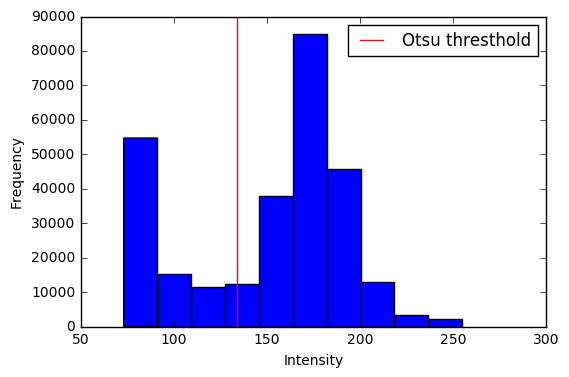

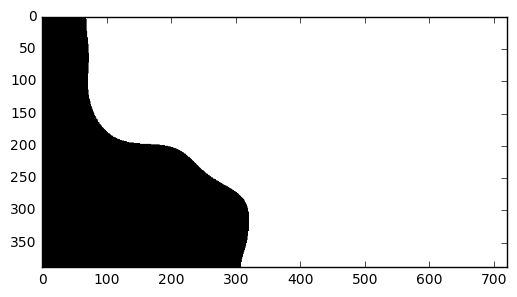

In [5]:
#
# (optional)
#
# manually adjust the binarization threshold based on pixel intensity histogram
# and recompute the mask
#
plt.hist(img_grad_blur.flatten())
plt.axvline(x=thresh_otsu, color='red', label='Otsu thresthold')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.plot()

mask = img_grad_blur > 110
plt.figure()
plt.imshow(mask, cmap='gray')
plt.show()

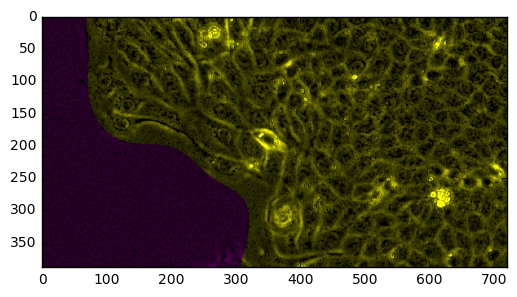

In [6]:
#
# You can see the result below
#
img_masked = img.copy()
img_masked[:, :, 1] = img_masked[:, :, 1] * mask
img_masked[:, :, 2] = img_masked[:, :, 2] * (1 - mask)
plt.imshow(img_masked)
plt.show()